In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Data Understanding

##Read Data

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Funadmentals Of Data Science/proj_fund_ds/data/mycyberbully.csv')
df.tail(5)

,Text,oh_label
230947,She pretty I love this song I miss the old kel...,1.0
230948,Status-Online Im ZxkillergirlzX! I'm Zxkillerg...,0.0
230949,JR so cute EXO M Better I agree like yeah yeah...,0.0
230950,! !,0.0
230951,great video and MERRY CHRISTMAS from greece :*...,0.0


##Check Missing Values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230952 entries, 0 to 230951
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Text      230951 non-null  object 
 1   oh_label  230949 non-null  float64
dtypes: float64(1), object(1)
memory usage: 3.5+ MB


In [ ]:
df[df['Text'].isnull() == True]

,Text,oh_label
213633,NaN,NaN


In [ ]:
df[df['oh_label'].isnull() == True]

,Text,oh_label
213632,RT @Lizzethismetal: Probably gonna piss off so...,NaN
213633,NaN,NaN
213634,1,NaN


##Data Visualization

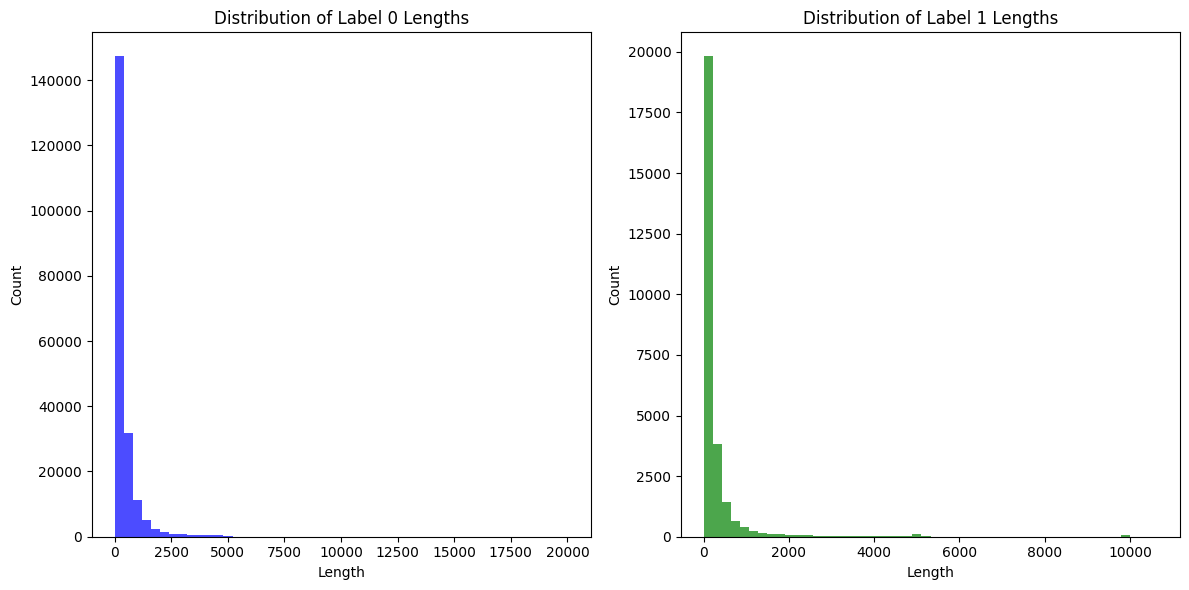

In [ ]:
import matplotlib.pyplot as plt

Train_lengths0 = [len(str(example)) for example in df[df['oh_label'] == 0]["Text"]]
Train_lengths1 = [len(str(example)) for example in df[df['oh_label'] == 1]["Text"]]

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(Train_lengths0, bins=50, alpha=0.7, color='blue')
plt.xlabel('Length')
plt.ylabel('Count')
plt.title('Distribution of Label 0 Lengths')

plt.subplot(1, 2, 2)
plt.hist(Train_lengths1, bins=50, alpha=0.7, color='green')
plt.xlabel('Length')
plt.ylabel('Count')
plt.title('Distribution of Label 1 Lengths')

plt.tight_layout()
plt.show()

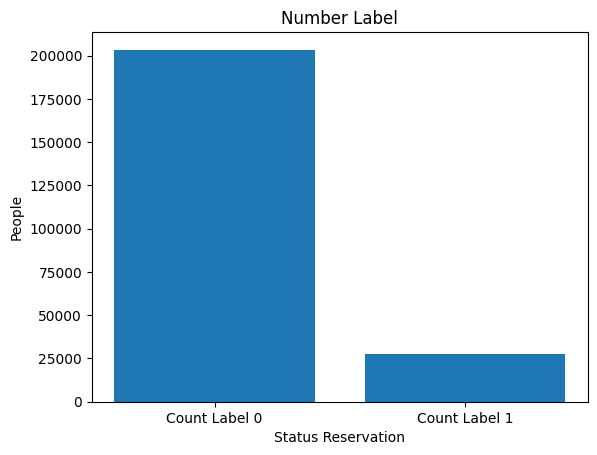

In [ ]:
count_label0 = df[df['oh_label'] == 0]['oh_label'].count()
count_label1 = df[df['oh_label'] == 1]['oh_label'].count()

plt.bar(['Count Label 0', 'Count Label 1'], [count_label0, count_label1])
plt.xlabel('Status Reservation')
plt.ylabel('People')
plt.title('Number Label')
plt.show()

#Data Preparation

##Eliminate Missing Values

In [ ]:
df = df[df['oh_label'].isnull() == False]
df.tail(5)

,Text,oh_label
230947,She pretty I love this song I miss the old kel...,1.0
230948,Status-Online Im ZxkillergirlzX! I'm Zxkillerg...,0.0
230949,JR so cute EXO M Better I agree like yeah yeah...,0.0
230950,! !,0.0
230951,great video and MERRY CHRISTMAS from greece :*...,0.0


In [ ]:
df.isnull().sum()

Text        0
oh_label    0
dtype: int64

##Select Data

In [ ]:
Train_lengths = pd.DataFrame([])
Train_lengths['Lenght Word'] = [len(str(example)) for example in df["Text"]]

Q1 = Train_lengths['Lenght Word'].quantile(0.25)
Q2 = Train_lengths['Lenght Word'].quantile(0.5)
Q3 = Train_lengths['Lenght Word'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print("Q1: {0}, Q2: {1}, Q3: {2}".format(Q1, Q2, Q3))
print("IQR: {0}".format(IQR))
print("Lower Bound: {0}, Upper Bound: {1}".format(lower_bound, upper_bound))

Q1: 93.0, Q2: 189.0, Q3: 420.0
IQR: 327.0
Lower Bound: -397.5, Upper Bound: 910.5


In [ ]:
data = []
label = []

for index, text in df['Text'].items():
  if len(str(text)) < upper_bound:
    data.append(str(df['Text'][index]))
    label.append(int(df['oh_label'][index]))

df = pd.DataFrame([])
df['Text'] = data
df['on_label'] = label
df

,Text,on_label
0,` :: the term ``standard model`` is itself le...,0
1,"True or false, the situation as of March 200...",0
2,"Next, maybe you could work on being less cond...",0
3,This page will need disambiguation.,0
4,- Important note for all sysops: There is a ...,0
...,...,...
208955,228((( real!!!! by walt disney=,0
208956,She pretty I love this song I miss the old kel...,1
208957,Status-Online Im ZxkillergirlzX! I'm Zxkillerg...,0
208958,JR so cute EXO M Better I agree like yeah yeah...,0


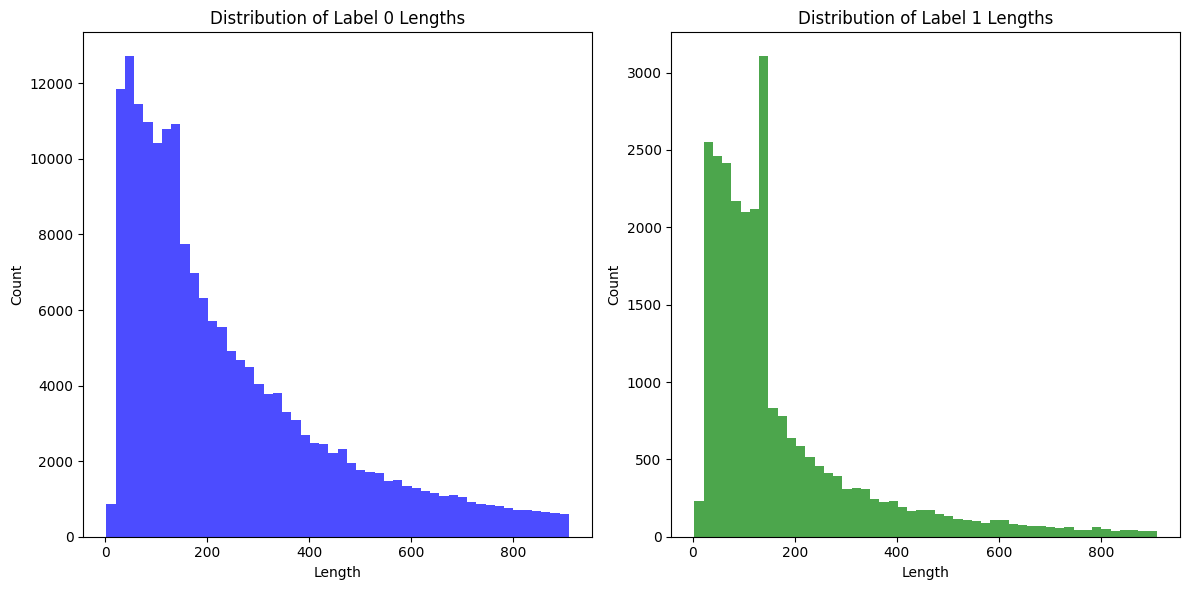

In [ ]:
Train_lengths0 = [len(str(example)) for example in df[df['on_label'] == 0]["Text"]]
Train_lengths1 = [len(str(example)) for example in df[df['on_label'] == 1]["Text"]]

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(Train_lengths0, bins=50, alpha=0.7, color='blue')
plt.xlabel('Length')
plt.ylabel('Count')
plt.title('Distribution of Label 0 Lengths')

plt.subplot(1, 2, 2)
plt.hist(Train_lengths1, bins=50, alpha=0.7, color='green')
plt.xlabel('Length')
plt.ylabel('Count')
plt.title('Distribution of Label 1 Lengths')

plt.tight_layout()
plt.show()

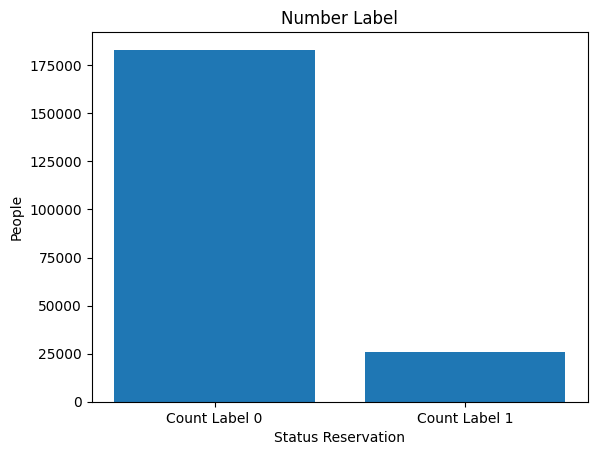

In [ ]:
count_label0 = df[df['on_label'] == 0]['on_label'].count()
count_label1 = df[df['on_label'] == 1]['on_label'].count()

plt.bar(['Count Label 0', 'Count Label 1'], [count_label0, count_label1])
plt.xlabel('Status Reservation')
plt.ylabel('People')
plt.title('Number Label')
plt.show()

##Downsampling

In [ ]:
from sklearn.utils import resample

majority_class = df[df['on_label'] == 0]
minority_class = df[df['on_label'] == 1]
df = resample(majority_class, replace=False, n_samples=len(minority_class), random_state=42)
df = pd.concat([df, minority_class])
df

,Text,on_label
140846,== February 2008 == Please stop. If you con...,0
85380,` ::The lead already says the first descriptio...,0
159423,"In addition, Corwin's claim that Pershing was ...",0
85244,"==Category:People from Westfield, Wisconsin==...",0
44552,_________ I also posted this: http://en.wiki...,0
...,...,...
208922,wat the fudge .. i thought hotted was american...,1
208932,Epic Is that lils wanyes bro because they are ...,1
208945,is that ron jeremy spotting him? Dee Snider yo...,1
208954,Justin looked like he was enjoying some of Nic...,1


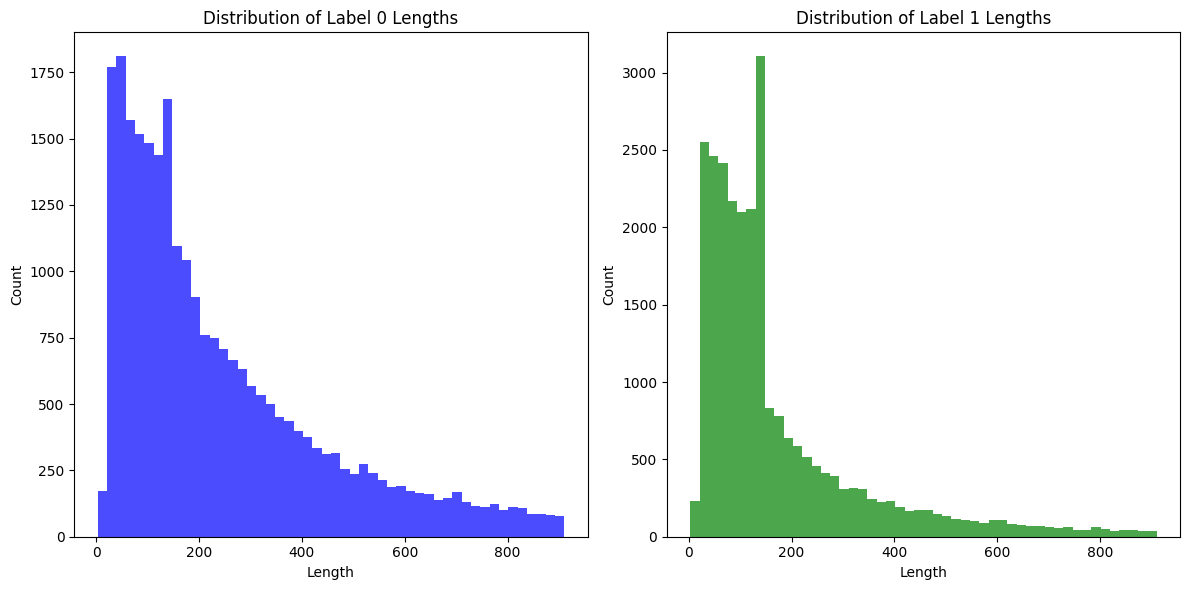

In [ ]:
Train_lengths0 = [len(str(example)) for example in df[df['on_label'] == 0]["Text"]]
Train_lengths1 = [len(str(example)) for example in df[df['on_label'] == 1]["Text"]]

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(Train_lengths0, bins=50, alpha=0.7, color='blue')
plt.xlabel('Length')
plt.ylabel('Count')
plt.title('Distribution of Label 0 Lengths')

plt.subplot(1, 2, 2)
plt.hist(Train_lengths1, bins=50, alpha=0.7, color='green')
plt.xlabel('Length')
plt.ylabel('Count')
plt.title('Distribution of Label 1 Lengths')

plt.tight_layout()
plt.show()

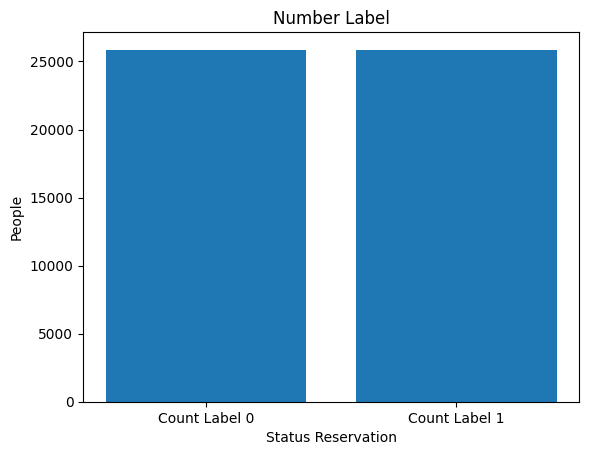

In [ ]:
count_label0 = df[df['on_label'] == 0]['on_label'].count()
count_label1 = df[df['on_label'] == 1]['on_label'].count()

plt.bar(['Count Label 0', 'Count Label 1'], [count_label0, count_label1])
plt.xlabel('Status Reservation')
plt.ylabel('People')
plt.title('Number Label')
plt.show()

##Divide Data

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(df.Text	, df.on_label, test_size=.1, random_state=42, stratify=df.on_label)
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

(46551,) (46551,)
(5173,) (5173,)


##Tokenizer

###BERT

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
Train_lengths = pd.DataFrame([])
Train_lengths['Lenght Word'] = [len(str(example)) for example in df["Text"]]

mean = Train_lengths['Lenght Word'].mean()
print(f'Mean: {mean}')

Mean: 207.05069213517902


In [ ]:
import tensorflow as tf

def tokenize_text(text):
    tokens = tokenizer.encode_plus(text, add_special_tokens=True, max_length=207, padding='max_length', truncation=True)
    return tokens['input_ids'], tokens['attention_mask']

X_train_tokens = [tokenize_text(text) for text in X_train]
X_val_tokens = [tokenize_text(text) for text in X_val]

train_dataset = tf.data.Dataset.from_tensor_slices(({
    'input_ids': [input_ids for input_ids, _ in X_train_tokens],
    'attention_mask': [attention_mask for _, attention_mask in X_train_tokens]
    }, y_train))
val_dataset = tf.data.Dataset.from_tensor_slices(({
    'input_ids': [input_ids for input_ids, _ in X_val_tokens],
    'attention_mask': [attention_mask for _, attention_mask in X_val_tokens]
    }, y_val))

###ALBERT

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("albert-base-v2")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/684 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/760k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.31M [00:00<?, ?B/s]

In [ ]:
Train_lengths = pd.DataFrame([])
Train_lengths['Lenght Word'] = [len(str(example)) for example in df["Text"]]

mean = Train_lengths['Lenght Word'].mean()
print(f'Mean: {mean}')

Mean: 207.05069213517902


In [ ]:
import tensorflow as tf

def tokenize_text(text):
    tokens = tokenizer.encode_plus(text, add_special_tokens=True, max_length=207, padding='max_length', truncation=True)
    return tokens['input_ids'], tokens['attention_mask']

X_train_tokens = [tokenize_text(text) for text in X_train]
X_val_tokens = [tokenize_text(text) for text in X_val]

train_dataset = tf.data.Dataset.from_tensor_slices(({
    'input_ids': [input_ids for input_ids, _ in X_train_tokens],
    'attention_mask': [attention_mask for _, attention_mask in X_train_tokens]
    }, y_train))
val_dataset = tf.data.Dataset.from_tensor_slices(({
    'input_ids': [input_ids for input_ids, _ in X_val_tokens],
    'attention_mask': [attention_mask for _, attention_mask in X_val_tokens]
    }, y_val))

###XLNet

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("xlnet-base-cased")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/760 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/798k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.38M [00:00<?, ?B/s]

In [ ]:
Train_lengths = pd.DataFrame([])
Train_lengths['Lenght Word'] = [len(str(example)) for example in df["Text"]]

mean = Train_lengths['Lenght Word'].mean()
print(f'Mean: {mean}')

Mean: 207.05069213517902


In [ ]:
import tensorflow as tf

def tokenize_text(text):
    tokens = tokenizer.encode_plus(text, add_special_tokens=True, max_length=207, padding='max_length', truncation=True)
    return tokens['input_ids'], tokens['attention_mask']

X_train_tokens = [tokenize_text(text) for text in X_train]
X_val_tokens = [tokenize_text(text) for text in X_val]

train_dataset = tf.data.Dataset.from_tensor_slices(({
    'input_ids': [input_ids for input_ids, _ in X_train_tokens],
    'attention_mask': [attention_mask for _, attention_mask in X_train_tokens]
    }, y_train))
val_dataset = tf.data.Dataset.from_tensor_slices(({
    'input_ids': [input_ids for input_ids, _ in X_val_tokens],
    'attention_mask': [attention_mask for _, attention_mask in X_val_tokens]
    }, y_val))

###DistilBERT

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
Train_lengths = pd.DataFrame([])
Train_lengths['Lenght Word'] = [len(str(example)) for example in df["Text"]]

mean = Train_lengths['Lenght Word'].mean()
print(f'Mean: {mean}')

Mean: 207.05069213517902


In [ ]:
import tensorflow as tf

def tokenize_text(text):
    tokens = tokenizer.encode_plus(text, add_special_tokens=True, max_length=207, padding='max_length', truncation=True)
    return tokens['input_ids'], tokens['attention_mask']

X_train_tokens = [tokenize_text(text) for text in X_train]
X_val_tokens = [tokenize_text(text) for text in X_val]

train_dataset = tf.data.Dataset.from_tensor_slices(({
    'input_ids': [input_ids for input_ids, _ in X_train_tokens],
    'attention_mask': [attention_mask for _, attention_mask in X_train_tokens]
    }, y_train))
val_dataset = tf.data.Dataset.from_tensor_slices(({
    'input_ids': [input_ids for input_ids, _ in X_val_tokens],
    'attention_mask': [attention_mask for _, attention_mask in X_val_tokens]
    }, y_val))

###RoBERTa

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("roberta-base")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [ ]:
Train_lengths = pd.DataFrame([])
Train_lengths['Lenght Word'] = [len(str(example)) for example in df["Text"]]

mean = Train_lengths['Lenght Word'].mean()
print(f'Mean: {mean}')

Mean: 207.05069213517902


In [ ]:
import tensorflow as tf

def tokenize_text(text):
    tokens = tokenizer.encode_plus(text, add_special_tokens=True, max_length=207, padding='max_length', truncation=True)
    return tokens['input_ids'], tokens['attention_mask']

X_train_tokens = [tokenize_text(text) for text in X_train]
X_val_tokens = [tokenize_text(text) for text in X_val]

train_dataset = tf.data.Dataset.from_tensor_slices(({
    'input_ids': [input_ids for input_ids, _ in X_train_tokens],
    'attention_mask': [attention_mask for _, attention_mask in X_train_tokens]
    }, y_train))
val_dataset = tf.data.Dataset.from_tensor_slices(({
    'input_ids': [input_ids for input_ids, _ in X_val_tokens],
    'attention_mask': [attention_mask for _, attention_mask in X_val_tokens]
    }, y_val))

#Modeling

##Train Model with BERT

###Fine Truning

In [ ]:
from transformers import TFAutoModelForSequenceClassification

model = TFAutoModelForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
learning_rate = 1e-6

optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metrics = [tf.keras.metrics.SparseCategoricalAccuracy(name='accuracy')]
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

In [ ]:
train_batch_size = 32
eval_batch_size = 32
num_epochs = 3

history = model.fit(
    train_dataset.shuffle(100).batch(train_batch_size),
    epochs=num_epochs,
    validation_data=val_dataset.batch(eval_batch_size)
)

Epoch 1/3
1455/1455 [==============================] - 2058s 1s/step - loss: 0.3943 - accuracy: 0.8297 - val_loss: 0.2681 - val_accuracy: 0.8939
Epoch 2/3
1455/1455 [==============================] - 2008s 1s/step - loss: 0.2685 - accuracy: 0.8906 - val_loss: 0.2476 - val_accuracy: 0.8970
Epoch 3/3
1455/1455 [==============================] - 2009s 1s/step - loss: 0.2479 - accuracy: 0.9004 - val_loss: 0.2387 - val_accuracy: 0.9004


### Evaluation Model

In [ ]:
import matplotlib.pyplot as plt

162/162 [==============================] - 79s 486ms/step


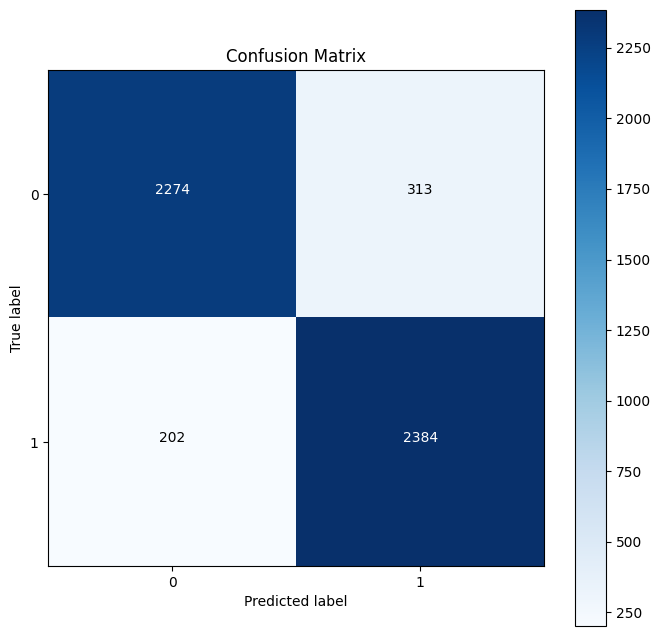

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score

y_pred = model.predict(val_dataset.batch(eval_batch_size))
y_pred = np.argmax(y_pred.logits, axis=1)
y_true = np.concatenate([y.numpy() for x, y in val_dataset.batch(eval_batch_size)], axis=0)

cm = confusion_matrix(y_true, y_pred)
f1 = f1_score(y_true, y_pred, average='weighted')
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')

plt.figure(figsize=(8, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

classes = [0, 1]
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > cm.max() / 2 else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

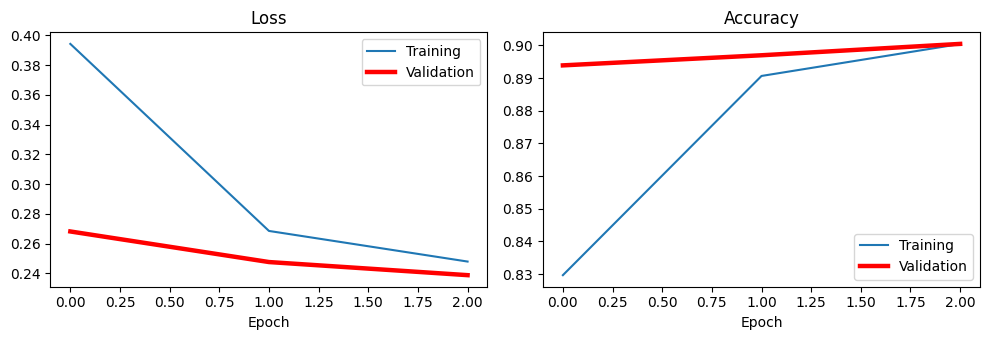

In [ ]:
plt.figure(figsize=(10, 3.5))
plt.subplot(1, 2, 1)
plt.title('Loss')
plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], 'r', lw=3.2, label='Validation')
plt.legend()
plt.xlabel('Epoch')

plt.subplot(1, 2, 2)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], 'r', lw=3.2, label='Validation')
plt.legend()
plt.xlabel('Epoch')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_true, y_pred)
acc

0.9004446162768219

In [ ]:
print("Accuracy Score: {:.3f}%".format(acc * 100))
print("F1 Score: {:.3f}%".format(f1 * 100))
print("Precision Score: {:.3f}%".format(precision * 100))
print("Recall Score: {:.3f}%".format(recall * 100))

Accuracy Score: 90.044%
F1 Score: 90.040%
Precision Score: 90.118%
Recall Score: 90.044%


###Save Model and Tokenizer

In [ ]:
model_save_path = '/content/drive/MyDrive/Colab Notebooks/Funadmentals Of Data Science/proj_fund_ds/model/BERT'
model.save_pretrained(model_save_path)
tokenizer_save_path = '/content/drive/MyDrive/Colab Notebooks/Funadmentals Of Data Science/proj_fund_ds/tokenizer/BERT'
tokenizer.save_pretrained(tokenizer_save_path)

##Train Model with ALBERT

###Fine Truning

In [ ]:
from transformers import TFAutoModelForSequenceClassification

model = TFAutoModelForSequenceClassification.from_pretrained("albert-base-v2", num_labels=2)

model.safetensors:   0%|          | 0.00/47.4M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFAlbertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFAlbertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
learning_rate = 1e-6

optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metrics = [tf.keras.metrics.SparseCategoricalAccuracy(name='accuracy')]
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

In [ ]:
train_batch_size = 32
eval_batch_size = 32
num_epochs = 3

history = model.fit(
    train_dataset.shuffle(100).batch(train_batch_size),
    epochs=num_epochs,
    validation_data=val_dataset.batch(eval_batch_size)
)

Epoch 1/3
1455/1455 [==============================] - 1957s 1s/step - loss: 0.3917 - accuracy: 0.8324 - val_loss: 0.2875 - val_accuracy: 0.8863
Epoch 2/3
1455/1455 [==============================] - 1932s 1s/step - loss: 0.2755 - accuracy: 0.8883 - val_loss: 0.2626 - val_accuracy: 0.8952
Epoch 3/3
1455/1455 [==============================] - 1935s 1s/step - loss: 0.2456 - accuracy: 0.9027 - val_loss: 0.2569 - val_accuracy: 0.8966


### Evaluation Model

In [ ]:
import matplotlib.pyplot as plt

162/162 [==============================] - 82s 486ms/step


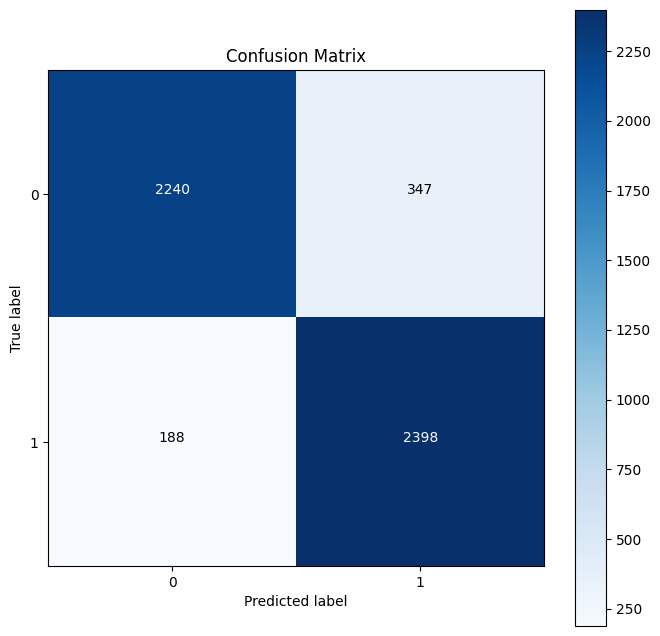

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score

y_pred = model.predict(val_dataset.batch(eval_batch_size))
y_pred = np.argmax(y_pred.logits, axis=1)
y_true = np.concatenate([y.numpy() for x, y in val_dataset.batch(eval_batch_size)], axis=0)

cm = confusion_matrix(y_true, y_pred)
f1 = f1_score(y_true, y_pred, average='weighted')
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')

plt.figure(figsize=(8, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

classes = [0, 1]
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > cm.max() / 2 else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

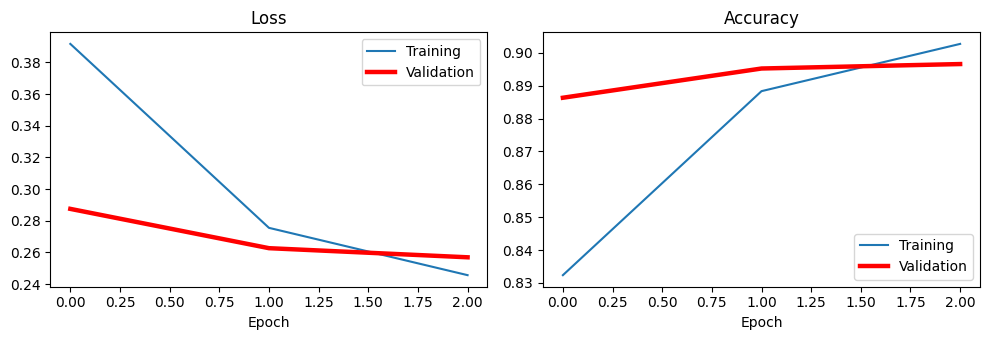

In [ ]:
plt.figure(figsize=(10, 3.5))
plt.subplot(1, 2, 1)
plt.title('Loss')
plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], 'r', lw=3.2, label='Validation')
plt.legend()
plt.xlabel('Epoch')

plt.subplot(1, 2, 2)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], 'r', lw=3.2, label='Validation')
plt.legend()
plt.xlabel('Epoch')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_true, y_pred)
acc

0.8965783877827179

In [ ]:
print("Accuracy Score: {:.3f}%".format(acc * 100))
print("F1 Score: {:.3f}%".format(f1 * 100))
print("Precision Score: {:.3f}%".format(precision * 100))
print("Recall Score: {:.3f}%".format(recall * 100))

Accuracy Score: 89.658%
F1 Score: 89.648%
Precision Score: 89.808%
Recall Score: 89.658%


###Save Model and Tokenizer

In [ ]:
model_save_path = '/content/drive/MyDrive/Colab Notebooks/Funadmentals Of Data Science/proj_fund_ds/model/ALBERT'
model.save_pretrained(model_save_path)
tokenizer_save_path = '/content/drive/MyDrive/Colab Notebooks/Funadmentals Of Data Science/proj_fund_ds/tokenizer/ALBERT'
tokenizer.save_pretrained(tokenizer_save_path)

('/content/drive/MyDrive/Colab Notebooks/Funadmentals Of Data Science/proj_fund_ds/tokenizer/albert/tokenizer_config.json',
 '/content/drive/MyDrive/Colab Notebooks/Funadmentals Of Data Science/proj_fund_ds/tokenizer/albert/special_tokens_map.json',
 '/content/drive/MyDrive/Colab Notebooks/Funadmentals Of Data Science/proj_fund_ds/tokenizer/albert/spiece.model',
 '/content/drive/MyDrive/Colab Notebooks/Funadmentals Of Data Science/proj_fund_ds/tokenizer/albert/added_tokens.json',
 '/content/drive/MyDrive/Colab Notebooks/Funadmentals Of Data Science/proj_fund_ds/tokenizer/albert/tokenizer.json')

##Train Model with XLNet

###Fine Truning

In [ ]:
from transformers import TFAutoModelForSequenceClassification

model = TFAutoModelForSequenceClassification.from_pretrained("xlnet-base-cased", num_labels=2)

tf_model.h5:   0%|          | 0.00/565M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer TruncatedNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(
Some layers from the model checkpoint at xlnet-base-cased were not used when initializing TFXLNetForSequenceClassification: ['lm_loss']
- This IS expected if you are initializing TFXLNetForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFXLNetForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertF

In [ ]:
learning_rate = 1e-6

optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metrics = [tf.keras.metrics.SparseCategoricalAccuracy(name='accuracy')]
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

In [ ]:
train_batch_size = 8
eval_batch_size = 8
num_epochs = 3

history = model.fit(
    train_dataset.shuffle(100).batch(train_batch_size),
    epochs=num_epochs,
    validation_data=val_dataset.batch(eval_batch_size)
)

Epoch 1/3


5819/5819 [==============================] - 3184s 540ms/step - loss: 0.3504 - accuracy: 0.8476 - val_loss: 0.2653 - val_accuracy: 0.8910
Epoch 2/3
5819/5819 [==============================] - 3142s 540ms/step - loss: 0.2684 - accuracy: 0.8875 - val_loss: 0.2478 - val_accuracy: 0.8974
Epoch 3/3
5819/5819 [==============================] - ETA: 0s - loss: 0.2457 - accuracy: 0.8987

### Evaluation Model

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score

y_pred = model.predict(val_dataset.batch(8))
y_pred = np.argmax(y_pred.logits, axis=1)
y_true = np.concatenate([y.numpy() for x, y in val_dataset.batch(8)], axis=0)

cm = confusion_matrix(y_true, y_pred)
f1 = f1_score(y_true, y_pred, average='weighted')
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')

plt.figure(figsize=(8, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

classes = [0, 1]
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > cm.max() / 2 else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

 40/647 [>.............................] - ETA: 1:39:55

In [ ]:
plt.figure(figsize=(10, 3.5))
plt.subplot(1, 2, 1)
plt.title('Loss')
plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], 'r', lw=3.2, label='Validation')
plt.legend()
plt.xlabel('Epoch')

plt.subplot(1, 2, 2)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], 'r', lw=3.2, label='Validation')
plt.legend()
plt.xlabel('Epoch')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_true, y_pred)
acc

In [ ]:
print("Accuracy Score: {:.3f}%".format(acc * 100))
print("F1 Score: {:.3f}%".format(f1 * 100))
print("Precision Score: {:.3f}%".format(precision * 100))
print("Recall Score: {:.3f}%".format(recall * 100))

###Save Model and Tokenizer

In [ ]:
model_save_path = '/content/drive/MyDrive/Colab Notebooks/Funadmentals Of Data Science/proj_fund_ds/model/XLNet'
model.save_pretrained(model_save_path)
tokenizer_save_path = '/content/drive/MyDrive/Colab Notebooks/Funadmentals Of Data Science/proj_fund_ds/tokenizer/XLNet'
tokenizer.save_pretrained(tokenizer_save_path)

##Train Model with DistilBERT

###Fine Truning

In [ ]:
from transformers import TFAutoModelForSequenceClassification

model = TFAutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_transform.weight', 'vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_projector.bias']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

In [ ]:
learning_rate = 1e-6

optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metrics = [tf.keras.metrics.SparseCategoricalAccuracy(name='accuracy')]
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

In [ ]:
train_batch_size = 32
eval_batch_size = 32
num_epochs = 3

history = model.fit(
    train_dataset.shuffle(100).batch(train_batch_size),
    epochs=num_epochs,
    validation_data=val_dataset.batch(eval_batch_size)
)

Epoch 1/3
1455/1455 [==============================] - 972s 651ms/step - loss: 0.4005 - accuracy: 0.8295 - val_loss: 0.2828 - val_accuracy: 0.8848
Epoch 2/3
1455/1455 [==============================] - 951s 654ms/step - loss: 0.2836 - accuracy: 0.8854 - val_loss: 0.2615 - val_accuracy: 0.8921
Epoch 3/3
1455/1455 [==============================] - 946s 650ms/step - loss: 0.2633 - accuracy: 0.8914 - val_loss: 0.2512 - val_accuracy: 0.8979


### Evaluation Model

In [ ]:
import matplotlib.pyplot as plt

162/162 [==============================] - 39s 223ms/step


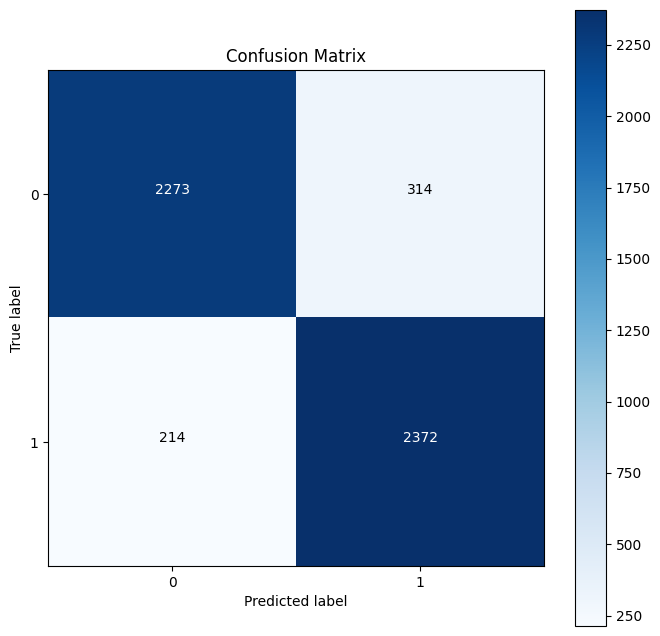

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score

y_pred = model.predict(val_dataset.batch(eval_batch_size))
y_pred = np.argmax(y_pred.logits, axis=1)
y_true = np.concatenate([y.numpy() for x, y in val_dataset.batch(eval_batch_size)], axis=0)

cm = confusion_matrix(y_true, y_pred)
f1 = f1_score(y_true, y_pred, average='weighted')
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')

plt.figure(figsize=(8, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

classes = [0, 1]
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > cm.max() / 2 else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

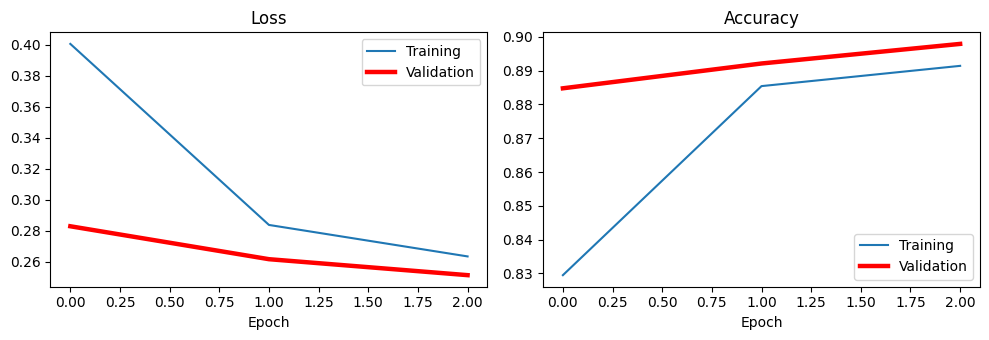

In [ ]:
plt.figure(figsize=(10, 3.5))
plt.subplot(1, 2, 1)
plt.title('Loss')
plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], 'r', lw=3.2, label='Validation')
plt.legend()
plt.xlabel('Epoch')

plt.subplot(1, 2, 2)
plt.title('Accuracy')plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], 'r', lw=3.2, label='Validation')
plt.legend()
plt.xlabel('Epoch')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_true, y_pred)
acc

0.8979315677556544

In [ ]:
print("Accuracy Score: {:.3f}%".format(acc * 100))
print("F1 Score: {:.3f}%".format(f1 * 100))
print("Precision Score: {:.3f}%".format(precision * 100))
print("Recall Score: {:.3f}%".format(recall * 100))

Accuracy Score: 89.793%
F1 Score: 89.789%
Precision Score: 89.853%
Recall Score: 89.793%


###Save Model and Tokenizer

In [ ]:
model_save_path = '/content/drive/MyDrive/Colab Notebooks/Funadmentals Of Data Science/proj_fund_ds/model/DistilBERT'
model.save_pretrained(model_save_path)
tokenizer_save_path = '/content/drive/MyDrive/Colab Notebooks/Funadmentals Of Data Science/proj_fund_ds/tokenizer/DistilBERT'
tokenizer.save_pretrained(tokenizer_save_path)

('/content/drive/MyDrive/Colab Notebooks/Funadmentals Of Data Science/proj_fund_ds/tokenizer/distilbert/tokenizer_config.json',
 '/content/drive/MyDrive/Colab Notebooks/Funadmentals Of Data Science/proj_fund_ds/tokenizer/distilbert/special_tokens_map.json',
 '/content/drive/MyDrive/Colab Notebooks/Funadmentals Of Data Science/proj_fund_ds/tokenizer/distilbert/vocab.txt',
 '/content/drive/MyDrive/Colab Notebooks/Funadmentals Of Data Science/proj_fund_ds/tokenizer/distilbert/added_tokens.json',
 '/content/drive/MyDrive/Colab Notebooks/Funadmentals Of Data Science/proj_fund_ds/tokenizer/distilbert/tokenizer.json')

##Train Model with RoBERTa

###Fine Truning

In [ ]:
from transformers import TFAutoModelForSequenceClassification

model = TFAutoModelForSequenceClassification.from_pretrained("roberta-base", num_labels=2)

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaForSequenceClassification: ['roberta.embeddings.position_ids']
- This IS expected if you are initializing TFRobertaForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFRobertaForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predicti

In [ ]:
learning_rate = 1e-6

optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metrics = [tf.keras.metrics.SparseCategoricalAccuracy(name='accuracy')]
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

In [ ]:
train_batch_size = 32
eval_batch_size = 32
num_epochs = 3

history = model.fit(
    train_dataset.shuffle(100).batch(train_batch_size),
    epochs=num_epochs,
    validation_data=val_dataset.batch(eval_batch_size)
)

Epoch 1/3
1455/1455 [==============================] - 2023s 1s/step - loss: 0.3624 - accuracy: 0.8277 - val_loss: 0.2446 - val_accuracy: 0.8999
Epoch 2/3
1455/1455 [==============================] - 1959s 1s/step - loss: 0.2535 - accuracy: 0.8968 - val_loss: 0.2324 - val_accuracy: 0.9064
Epoch 3/3
1455/1455 [==============================] - 1959s 1s/step - loss: 0.2390 - accuracy: 0.9023 - val_loss: 0.2265 - val_accuracy: 0.9109


### Evaluation Model

In [ ]:
import matplotlib.pyplot as plt

162/162 [==============================] - 76s 453ms/step


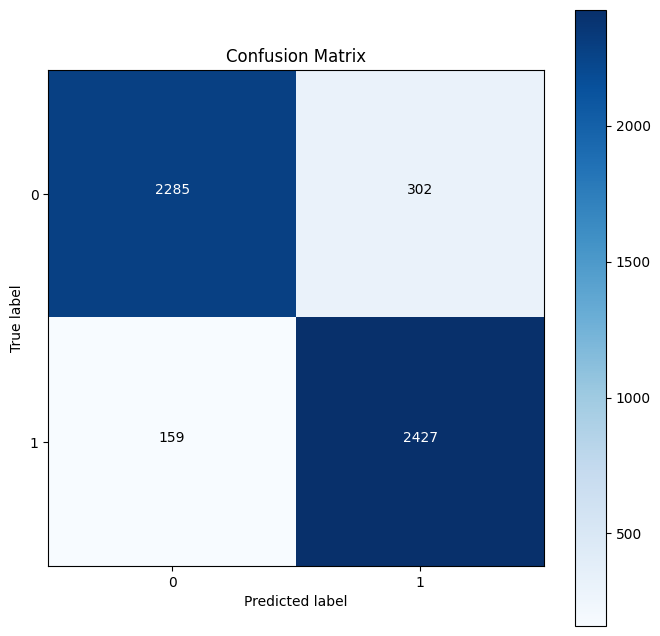

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score

y_pred = model.predict(val_dataset.batch(eval_batch_size))
y_pred = np.argmax(y_pred.logits, axis=1)
y_true = np.concatenate([y.numpy() for x, y in val_dataset.batch(eval_batch_size)], axis=0)

cm = confusion_matrix(y_true, y_pred)
f1 = f1_score(y_true, y_pred, average='weighted')
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')

plt.figure(figsize=(8, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

classes = [0, 1]
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > cm.max() / 2 else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

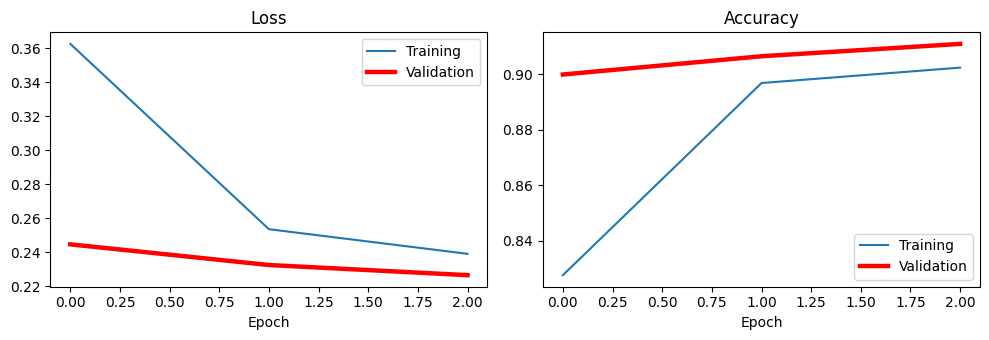

In [ ]:
plt.figure(figsize=(10, 3.5))
plt.subplot(1, 2, 1)
plt.title('Loss')
plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], 'r', lw=3.2, label='Validation')
plt.legend()
plt.xlabel('Epoch')

plt.subplot(1, 2, 2)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], 'r', lw=3.2, label='Validation')
plt.legend()
plt.xlabel('Epoch')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_true, y_pred)
acc

0.9108834332109028

In [ ]:
print("Accuracy Score: {:.3f}%".format(acc * 100))
print("F1 Score: {:.3f}%".format(f1 * 100))
print("Precision Score: {:.3f}%".format(precision * 100))
print("Recall Score: {:.3f}%".format(recall * 100))

Accuracy Score: 91.088%
F1 Score: 91.082%
Precision Score: 91.214%
Recall Score: 91.088%


###Save Model and Tokenizer

In [ ]:
model_save_path = '/content/drive/MyDrive/Colab Notebooks/Funadmentals Of Data Science/proj_fund_ds/model/RoBERTa'
model.save_pretrained(model_save_path)
tokenizer_save_path = '/content/drive/MyDrive/Colab Notebooks/Funadmentals Of Data Science/proj_fund_ds/tokenizer/RoBERTa'
tokenizer.save_pretrained(tokenizer_save_path)

('/content/drive/MyDrive/Colab Notebooks/Funadmentals Of Data Science/proj_fund_ds/tokenizer/Roberta/tokenizer_config.json',
 '/content/drive/MyDrive/Colab Notebooks/Funadmentals Of Data Science/proj_fund_ds/tokenizer/Roberta/special_tokens_map.json',
 '/content/drive/MyDrive/Colab Notebooks/Funadmentals Of Data Science/proj_fund_ds/tokenizer/Roberta/vocab.json',
 '/content/drive/MyDrive/Colab Notebooks/Funadmentals Of Data Science/proj_fund_ds/tokenizer/Roberta/merges.txt',
 '/content/drive/MyDrive/Colab Notebooks/Funadmentals Of Data Science/proj_fund_ds/tokenizer/Roberta/added_tokens.json',
 '/content/drive/MyDrive/Colab Notebooks/Funadmentals Of Data Science/proj_fund_ds/tokenizer/Roberta/tokenizer.json')

#Evaluation

In [ ]:
from transformers import TFAutoModelForSequenceClassification

model_save_path = '/content/drive/MyDrive/Colab Notebooks/Funadmentals Of Data Science/proj_fund_ds/model/RoBERTa'
model = TFAutoModelForSequenceClassification.from_pretrained(model_save_path)
model

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at /content/drive/MyDrive/Colab Notebooks/Funadmentals Of Data Science/proj_fund_ds/model/RoBERTa.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.


In [ ]:
from transformers import AutoTokenizer

tokenizer_save_path = 'roberta-base'
tokenizer = AutoTokenizer.from_pretrained(tokenizer_save_path)
tokenizer

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

RobertaTokenizerFast(name_or_path='roberta-base', vocab_size=50265, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<s>', 'eos_token': '</s>', 'unk_token': '<unk>', 'sep_token': '</s>', 'pad_token': '<pad>', 'cls_token': '<s>', 'mask_token': '<mask>'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	0: AddedToken("<s>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
	1: AddedToken("<pad>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
	2: AddedToken("</s>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
	3: AddedToken("<unk>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
	50264: AddedToken("<mask>", rstrip=False, lstrip=True, single_word=False, normalized=False, special=True),
}

In [ ]:
def tokenize_text(text):
    tokens = tokenizer.encode_plus(text, add_special_tokens=True, max_length=207, padding='max_length', truncation=True)
    return tokens['input_ids'], tokens['attention_mask']

text_input = ["But it's the truth? Ive been with heaps of white chicks and they all say the same thing, you whites are baby in the sack ;) Im just sayin is all! ;)",
              "how did the laptop come about? who made the first laptop?",
              "muang thai maeng khod ron chibhai leoy aw wawaawwaawwawaawwa",
              "shud up n1gga",
              "fkking dog uninstall please",
              "Please consider acting like human for once",
              "n1gger fxggot n1gger fxggot n1gger fxggot n1gger fxggot n1gger fxggot n1gger fxggot n1gger fxggot",
              "suck my d1ck"]
X_test_tokens = [tokenize_text(i) for i in text_input]

In [ ]:
import tensorflow as tf

test_dataset = tf.data.Dataset.from_tensor_slices(({
    'input_ids': [input_ids for input_ids, _ in X_test_tokens],
    'attention_mask': [attention_mask for _, attention_mask in X_test_tokens]
}, np.zeros(len(X_test_tokens))))

##Comment: 1

In [ ]:
predictions = model.predict(test_dataset.batch(16))
predicted_labels = np.argmax(predictions.logits, axis=1)
print(f"Input: {text_input[0]}")
print(f"Class: {predicted_labels[0]}")

1/1 [==============================] - 14s 14s/step
Input: But it's the truth? Ive been with heaps of white chicks and they all say the same thing, you whites are baby in the sack ;) Im just sayin is all! ;)
Class: 1


##Comment: 2

In [ ]:
predictions = model.predict(test_dataset.batch(16))
predicted_labels = np.argmax(predictions.logits, axis=1)
print(f"Input: {text_input[1]}")
print(f"Class: {predicted_labels[1]}")

1/1 [==============================] - 0s 168ms/step
Input: how did the laptop come about? who made the first laptop?
Class: 0


##Comment: 3

In [ ]:
predictions = model.predict(test_dataset.batch(16))
predicted_labels = np.argmax(predictions.logits, axis=1)
print(f"Input: {text_input[2]}")
print(f"Class: {predicted_labels[2]}")

1/1 [==============================] - 0s 180ms/step
Input: muang thai maeng khod ron chibhai leoy aw wawaawwaawwawaawwa
Class: 0


##Comment: 4

In [ ]:
predictions = model.predict(test_dataset.batch(16))
predicted_labels = np.argmax(predictions.logits, axis=1)
print(f"Input: {text_input[3]}")
print(f"Class: {predicted_labels[3]}")

1/1 [==============================] - 0s 198ms/step
Input: shud up n1gga
Class: 1


##Comment: 5

In [ ]:
predictions = model.predict(test_dataset.batch(16))
predicted_labels = np.argmax(predictions.logits, axis=1)
print(f"Input: {text_input[4]}")
print(f"Class: {predicted_labels[4]}")

1/1 [==============================] - 0s 184ms/step
Input: fkking dog uninstall please
Class: 1


##Comment: 6

In [ ]:
predictions = model.predict(test_dataset.batch(16))
predicted_labels = np.argmax(predictions.logits, axis=1)
print(f"Input: {text_input[5]}")
print(f"Class: {predicted_labels[5]}")

1/1 [==============================] - 0s 172ms/step
Input: Please consider acting like human for once
Class: 0


##Comment: 7

In [ ]:
predictions = model.predict(test_dataset.batch(16))
predicted_labels = np.argmax(predictions.logits, axis=1)
print(f"Input: {text_input[6]}")
print(f"Class: {predicted_labels[6]}")

1/1 [==============================] - 0s 140ms/step
Input: n1gger fxggot n1gger fxggot n1gger fxggot n1gger fxggot n1gger fxggot n1gger fxggot n1gger fxggot
Class: 1


##Comment: 8

In [ ]:
predictions = model.predict(test_dataset.batch(16))
predicted_labels = np.argmax(predictions.logits, axis=1)
print(f"Input: {text_input[7]}")
print(f"Class: {predicted_labels[7]}")

1/1 [==============================] - 0s 115ms/step
Input: suck my d1ck
Class: 1
